### Correlation Analysis


Correlation analysis is a crucial step in exploratory data analysis (EDA) as it helps to understand the relationships between variables. 

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [4, 4.5]

In [70]:
df = sns.load_dataset("iris")

In [71]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [110]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

#### Pearson Correlation Coefficient

Measures the linear correlation between two variables, giving a value between -1 (perfect negative linear relationship) and +1 (perfect positive linear relationship).

In [113]:
numeric_df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [114]:
numeric_df.corr()['petal_length'][:].sort_values(ascending=False).to_frame()

,petal_length
petal_length,1.000000
petal_width,0.962865
sepal_length,0.871754
sepal_width,-0.428440


There is a very strong positive correlation between petal length and petal width. This suggests that as petal length increases, petal width tends to increase in a linear fashion, and vice versa. 

#### Correlation Matrix
A correlation matrix is a square table that shows the correlation coefficients between all pairs of (numeric) variables in a dataset. <br>
It ranges from -1 to 1, with a coefficient of -1 indicating a perfect negative correlation, a coefficient of 1 indicating a perfect positive correlation, and a coefficient of 0 indicating no correlation. <br>

In [118]:
def corr_matrix(df):
    # Compute the correlation matrix
    correlation_matrix = df.corr()

    # Generate a mask for the bottom half of the correlation matrix
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

    # Create a heatmap with the mask and color scale
    plt.figure(figsize=(6, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=mask, square=True, cbar=True)
    plt.title('Correlation Plot')
    plt.show()

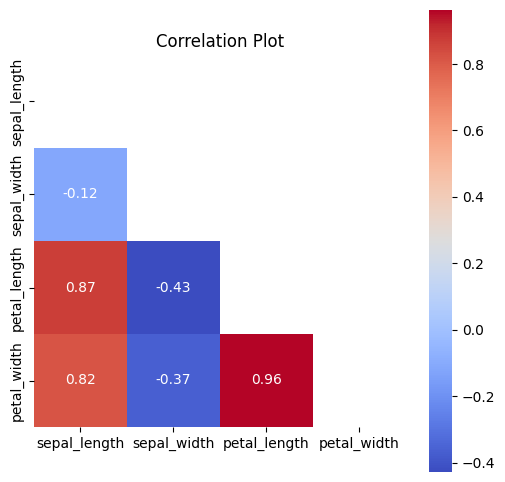

In [117]:
corr_matrix(numeric_df)

The colors correspond to the correlation coefficient values, with red indicating positive correlation and blue indicating negative correlation. <br>
Looking at this matrix, you can deduce which variables have a stronger relationship. For instance, there is a strong positive correlation between petal length and petal width, as indicated by the dark red color in the matrix. This suggests that as the petal length increases, the petal width also tends to increase significantly.

#### Scatterplot + Linear Regression Fit Line
A scatterplot with a linear regression fit line is used for visualizing and understanding the relationship between two quantitative variables. <br>
The sns.lmplot() and sns.regplot() functions in Seaborn, are both used to create scatter plots with a linear regression line and a 95% confidence interval. <br>
But only lmplot() has hue as a parameter.


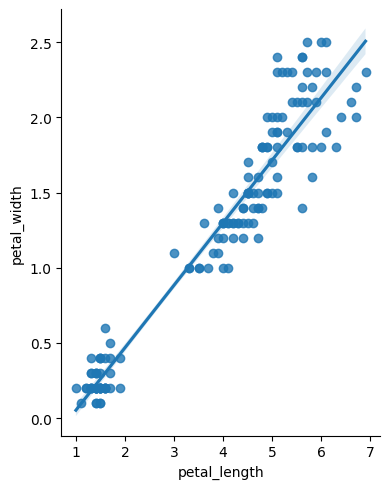

In [96]:
sns.lmplot(x="petal_length", y="petal_width", data=df, aspect=1.2/1.5);

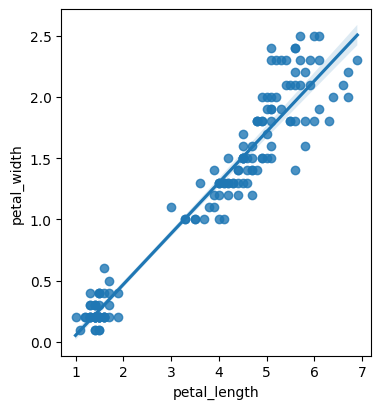

In [86]:

sns.regplot(x="petal_length", y="petal_width", data=df);

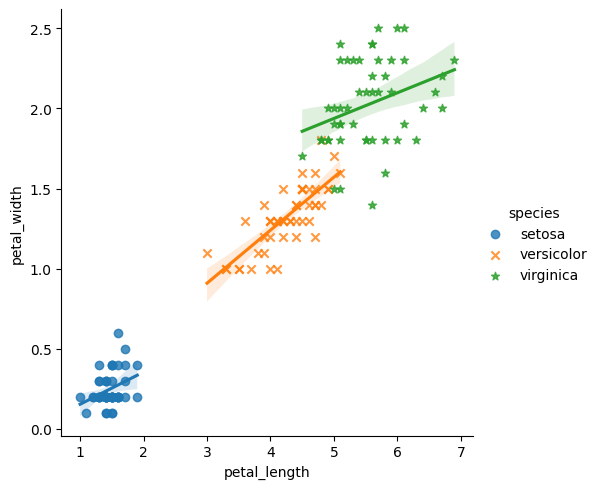

In [97]:
sns.lmplot(x="petal_length", y="petal_width", data=df, hue='species', markers=["o", "x", "*"]);

#### Pairplot
A pairplot shows pairwise relationship between all variables in a dataset.

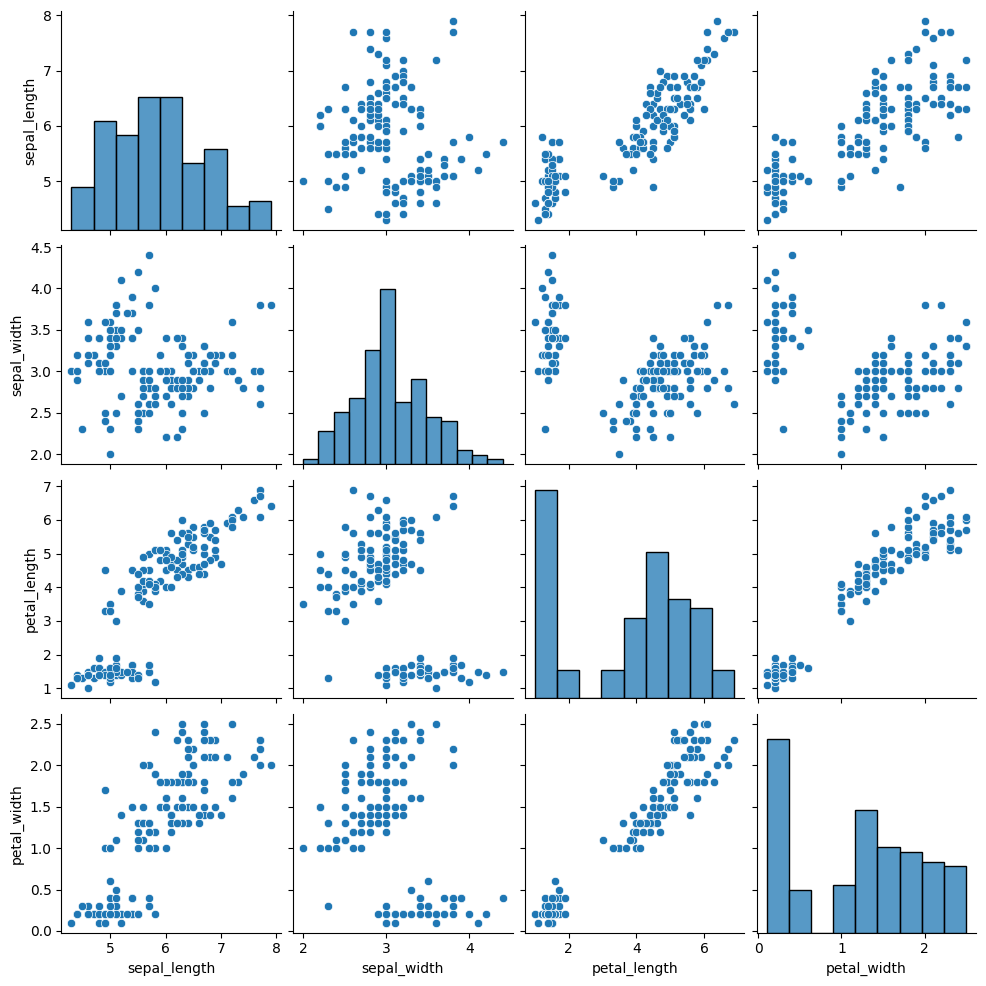

In [99]:
sns.pairplot(df)
plt.show()